In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.express as px
 
import math 
%matplotlib inline
from datetime import datetime, date

# Preparing Date Set

In [2]:
# Loading the Transactions and Customer Demographics Datasets

tran = pd.read_csv('Transactions_Cleaned.csv')
cus_dem = pd.read_csv('CustomerDemographic_Cleaned.csv')

In [3]:
# Fetching first 5 transaction records

tran.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [4]:
# Total Records

print("Total records (rows) in the Transaction Dataset : {}".format(tran.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(tran.shape[1]))

Total records (rows) in the Transaction Dataset : 19803
Total features (columns) in the Transaction Dataset : 14


In [5]:
# Fetching first 5 Customer Demograhics records

cus_dem.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,70.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,50.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,70.0
3,4,Talbot,NaN,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61,70.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,50.0


In [6]:
# Total Records

print("Total records (rows) in the Customer Demographics Dataset : {}".format(cus_dem.shape[0]))
print("Total features (columns) in the Customer Demographics Dataset : {}".format(cus_dem.shape[1]))

Total records (rows) in the Customer Demographics Dataset : 3912
Total features (columns) in the Customer Demographics Dataset : 14


In [7]:
merged_tran_cusdemo = pd.merge(tran, cus_dem, left_on= 'customer_id' , right_on= 'customer_id' , how = 'inner')

In [8]:
# Fetching the first 5 records of the merged dataset.

merged_tran_cusdemo.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,70.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,70.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68,70.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44,50.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44,50.0


In [9]:
# Total records

print("Total records (rows) in the Merged Dataset : {}".format(merged_tran_cusdemo.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_tran_cusdemo.shape[1]))

Total records (rows) in the Merged Dataset : 19354
Total features (columns) in the Merged Dataset : 27


In [10]:
merged_tran_cusdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [11]:
merged_tran_cusdemo['transaction_date'] = pd.to_datetime(merged_tran_cusdemo['transaction_date'])

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

**Recency (R)**: Who have purchased recently? Number of days since last purchase (least recency)\
**Frequency (F)**: Who has purchased frequently? It means the total number of purchases. ( high frequency)\
**Monetary Value(M)**: Who have high purchase amount? It means the total money customer spent (high monetary value)

In [12]:
# Maximum Transaction Date or the latest transaction date.

max_tran_date = max(merged_tran_cusdemo['transaction_date']).date()
max_tran_date

datetime.date(2017, 12, 30)

In [13]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_tran_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2017, 12, 30, 0, 0)

In [14]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data.

rfm_table = merged_tran_cusdemo.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()),
                                                              'product_id' : lambda prod_id : len(prod_id),
                                                              'Profit' : lambda p : sum(p)})

In [15]:
rfm_table

,transaction_date,product_id,Profit
customer_id,,,
1,7 days,11,3018.09
2,128 days,3,2226.26
3,102 days,8,3362.81
4,195 days,2,220.57
5,16 days,6,2394.94
...,...,...,...
3496,256 days,4,2045.84
3497,52 days,3,1648.32
3498,127 days,6,3147.33


In [16]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [17]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'transaction_date' : 'recency',
                          'product_id' : 'frequency',
                          'Profit' : 'monetary'} , inplace = True) 

In [18]:
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7 days,11,3018.09
2,128 days,3,2226.26
3,102 days,8,3362.81
4,195 days,2,220.57
5,16 days,6,2394.94
...,...,...,...
3496,256 days,4,2045.84
3497,52 days,3,1648.32
3498,127 days,6,3147.33


In [19]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4 , ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4 , ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4 , ['1','2','3','4'])


In [20]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7 days,11,3018.09,4,4,3
2,128 days,3,2226.26,1,1,2
3,102 days,8,3362.81,1,4,3
4,195 days,2,220.57,1,1,1
5,16 days,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256 days,4,2045.84,1,1,2
3497,52 days,3,1648.32,2,1,1
3498,127 days,6,3147.33,1,2,3


In [21]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)  +  10*rfm_table['f_quartile'].astype(int)  +  rfm_table['m_quartile'].astype(int)           

In [22]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
1,7 days,11,3018.09,4,4,3,443
2,128 days,3,2226.26,1,1,2,112
3,102 days,8,3362.81,1,4,3,143
4,195 days,2,220.57,1,1,1,111
5,16 days,6,2394.94,4,2,2,422
...,...,...,...,...,...,...,...
3496,256 days,4,2045.84,1,1,2,112
3497,52 days,3,1648.32,2,1,1,211
3498,127 days,6,3147.33,1,2,3,123


In [23]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4 , ['Bronze' , 'Silver' , 'Gold' , 'Platinum'])

In [24]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7 days,11,3018.09,4,4,3,443,Platinum
2,128 days,3,2226.26,1,1,2,112,Bronze
3,102 days,8,3362.81,1,4,3,143,Bronze
4,195 days,2,220.57,1,1,1,111,Bronze
5,16 days,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256 days,4,2045.84,1,1,2,112,Bronze
3497,52 days,3,1648.32,2,1,1,211,Bronze
3498,127 days,6,3147.33,1,2,3,123,Bronze


#### Merging both RFM Table with Transaction and Customer Demographics Tables

The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [25]:
merged_tran_cusdemo_rfm = pd.merge(merged_tran_cusdemo , rfm_table , left_on= 'customer_id' , right_on= 'customer_id' , how= 'inner')

In [26]:
merged_tran_cusdemo_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,age_group,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,68,70.0,75 days,3,645.99,2,1,1,211,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,68,70.0,75 days,3,645.99,2,1,1,211,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,68,70.0,75 days,3,645.99,2,1,1,211,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,44,50.0,20 days,7,4179.11,3,3,4,334,Gold
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,44,50.0,20 days,7,4179.11,3,3,4,334,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,47,50.0,91 days,4,5170.51,1,1,4,114,Bronze
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,47,50.0,91 days,4,5170.51,1,1,4,114,Bronze
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,47,50.0,91 days,4,5170.51,1,1,4,114,Bronze
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,47,50.0,91 days,4,5170.51,1,1,4,114,Bronze


In [27]:
merged_tran_cusdemo_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   transaction_id                       19354 non-null  int64          
 1   product_id                           19354 non-null  int64          
 2   customer_id                          19354 non-null  int64          
 3   transaction_date                     19354 non-null  datetime64[ns] 
 4   online_order                         19354 non-null  float64        
 5   order_status                         19354 non-null  object         
 6   brand                                19354 non-null  object         
 7   product_line                         19354 non-null  object         
 8   product_class                        19354 non-null  object         
 9   product_size                         19354 non-null  object         
 10

**The datatypes of the columns looks fine.**

#### Creating an Age Group Feature

In [28]:
merged_tran_cusdemo_rfm['age_group'] = pd.cut(merged_tran_cusdemo_rfm['age'], bins = [0,20,30,40,50,60,70,80,90], labels = ['20','30','40','50','60','70','80','90'])

_Other way is to use Lambda function_

In [29]:
# merged_tran_cusdemo_rfm['Age_Group'] = merged_tran_cusdemo_rfm['age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [30]:
merged_tran_cusdemo_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,age_group,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,68,70,75 days,3,645.99,2,1,1,211,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,68,70,75 days,3,645.99,2,1,1,211,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,68,70,75 days,3,645.99,2,1,1,211,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,44,50,20 days,7,4179.11,3,3,4,334,Gold
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,44,50,20 days,7,4179.11,3,3,4,334,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,47,50,91 days,4,5170.51,1,1,4,114,Bronze
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,47,50,91 days,4,5170.51,1,1,4,114,Bronze
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,47,50,91 days,4,5170.51,1,1,4,114,Bronze
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,47,50,91 days,4,5170.51,1,1,4,114,Bronze


### Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.\
**The demarkation of customers into the above mentioned groups is based on their RFM scores.**

In [31]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup (cols) :
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >= 433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >= 421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >= 344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >= 311 and rfm_score < 344:
        return 'Late Bloomer'
    elif rfm_score >= 224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >= 212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >= 124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >= 112 and rfm_score < 124:
        return 'Evasive Customer'
    else:
        return 'Lost Customer'


In [32]:
# Applying the above functions and creating a new feature detail_cust_title

merged_tran_cusdemo_rfm['detail_cust_title'] = merged_tran_cusdemo_rfm[['rfm_score']]. apply(cust_score_title_lkup, axis =1)

In [33]:
merged_tran_cusdemo_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age_group,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,detail_cust_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,70,75 days,3,645.99,2,1,1,211,Bronze,Almost Lost Customer
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,70,75 days,3,645.99,2,1,1,211,Bronze,Almost Lost Customer
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,70,75 days,3,645.99,2,1,1,211,Bronze,Almost Lost Customer
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,50,20 days,7,4179.11,3,3,4,334,Gold,Late Bloomer
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,50,20 days,7,4179.11,3,3,4,334,Gold,Late Bloomer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,50,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,50,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,50,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,50,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer


In [34]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    detail_cust_title = cols[0]
    
    if detail_cust_title == 'Platinum Customer':
        return 1
    elif detail_cust_title == "Very Loyal":
        return  2
    elif detail_cust_title == 'Becoming Loyal':
        return   3
    elif detail_cust_title == 'Recent Customer' :
        return    4
    elif detail_cust_title == 'Potential Customer' :
        return    5
    elif detail_cust_title == 'Late Bloomer' :
        return    6
    elif detail_cust_title == 'Loosing Customer' :
        return    7
    elif detail_cust_title == 'High Risk Customer' :
        return    8
    elif detail_cust_title == 'Almost Lost Customer' :
        return    9
    elif detail_cust_title == 'Evasive Customer' :
        return    10
    else :
        return  11
    

In [35]:
merged_tran_cusdemo_rfm['rank'] = merged_tran_cusdemo_rfm[['detail_cust_title']].apply(get_rank, axis = 1)

In [36]:
merged_tran_cusdemo_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,75 days,3,645.99,2,1,1,211,Bronze,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,75 days,3,645.99,2,1,1,211,Bronze,Almost Lost Customer,9
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,75 days,3,645.99,2,1,1,211,Bronze,Almost Lost Customer,9
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,20 days,7,4179.11,3,3,4,334,Gold,Late Bloomer,6
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,20 days,7,4179.11,3,3,4,334,Gold,Late Bloomer,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer,10
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer,10
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer,10
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,91 days,4,5170.51,1,1,4,114,Bronze,Evasive Customer,10


### Exporting to CSV File

After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the **Sales Customer Segmenation Dashboard** developed in **Tableau**.

In [37]:
merged_tran_cusdemo_rfm.to_csv("Customer_Trans_RFM_Analysis.csv" , index=False)

In [38]:
merged_tran_cusdemo_rfm.to_excel("Customer_Trans_RFM_Analysis1.xlsx" , index=False)

# EDA

In [39]:
merged_tran_cusdemo_rfm.nunique()

transaction_id                         19354
product_id                               101
customer_id                             3416
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               100
standard_cost                            100
product_first_sold_date                  100
Profit                                   100
first_name                              2781
last_name                               3197
gender                                     2
past_3_years_bike_related_purchases      100
DOB                                     3050
job_title                                195
job_industry_category                     10
wealth_segment                             3
deceased_i

### 1.1 New Customer vs Old Customer Age Distributions

In [42]:
# Loading the New Customers Dataset

new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

C:\Users\usama\AppData\Local\Temp\ipykernel_940\3251060934.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




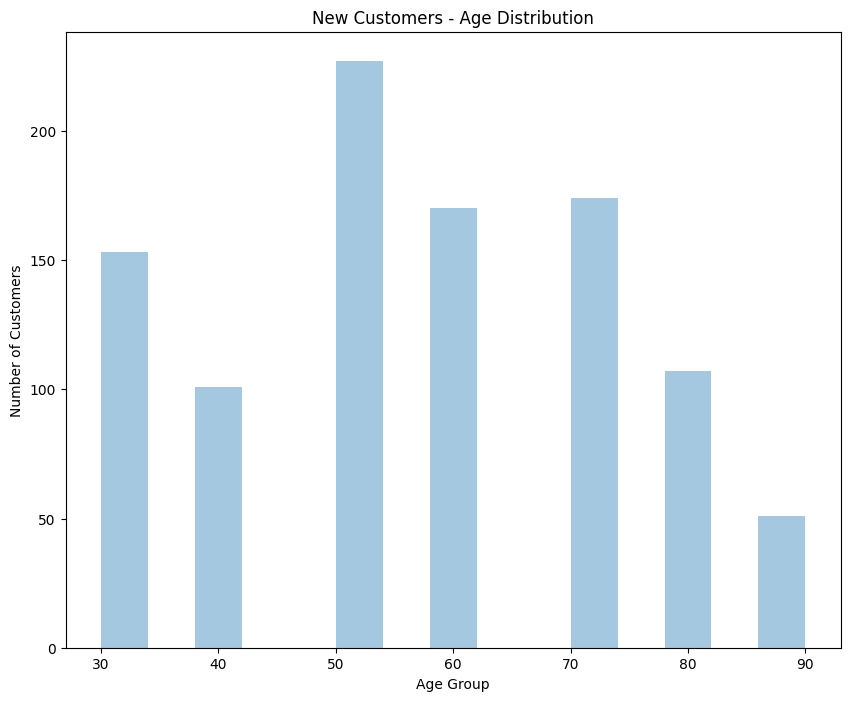

In [43]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['age_group'] , kde = False , bins = 15)
# sns.histplot(data = new_cust , x='age_group' , bins = 15 )
# sns.countplot(data = new_cust , x='age_group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()

C:\Users\usama\AppData\Local\Temp\ipykernel_940\242238167.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




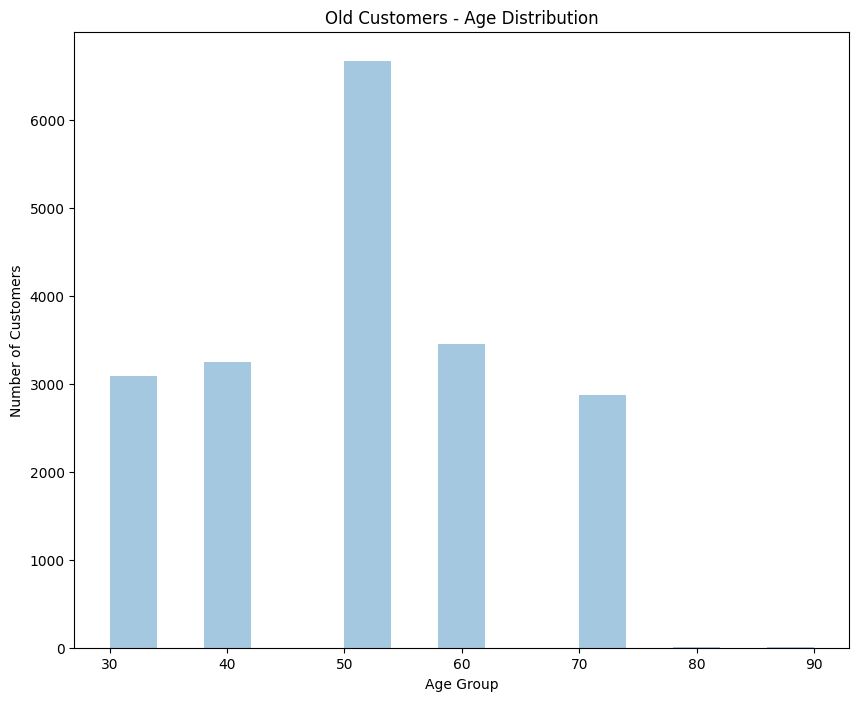

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(merged_tran_cusdemo_rfm['age_group'], kde = False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

### 1.2 Bike related purchases over last 3 years by gender

In [45]:
cust_bike_purchase_by_gender = merged_tran_cusdemo_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}).reset_index()

In [46]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases
0,Female,478488
1,Male,468943


In [47]:
total_records = merged_tran_cusdemo_rfm['past_3_years_bike_related_purchases'].sum()
total_records

947431

In [48]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']/total_records) * 100

In [49]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


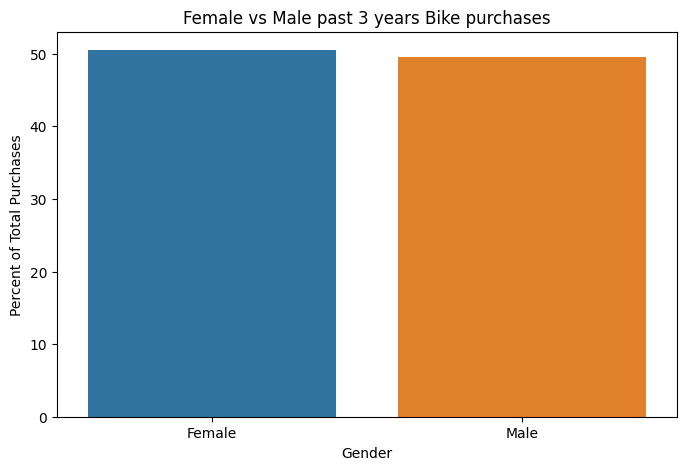

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(data=cust_bike_purchase_by_gender, x='gender',y='Percent_of_total')
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

In [40]:
fig = px.scatter(merged_tran_cusdemo_rfm, x = 'past_3_years_bike_related_purchases' , y = 'monetary', color = 'gender')
fig.show()

In [41]:
fig = px.bar(merged_tran_cusdemo_rfm, x = 'gender' , y = 'monetary')
fig.show()

### 1.3 Job Industry Customer Distribution

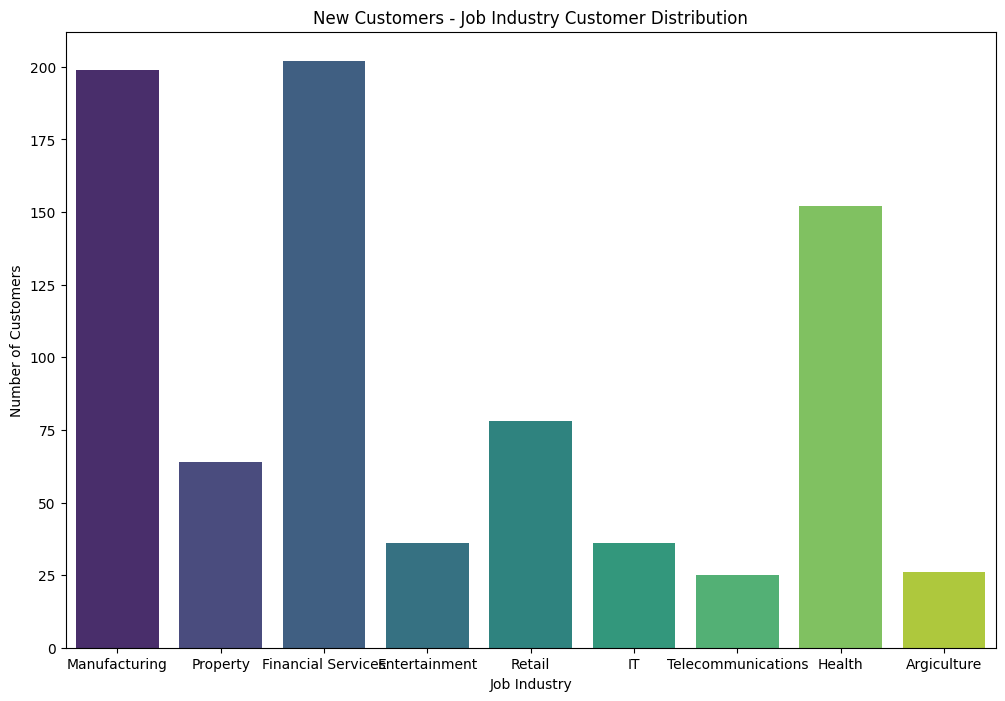

In [51]:
plt.figure(figsize=(12,8))
# sns.countplot(data=new_cust, x='job_industry_category')
sns.countplot(data=new_cust[~(new_cust['job_industry_category'] == 'Missing')] , x='job_industry_category' , palette='viridis')
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

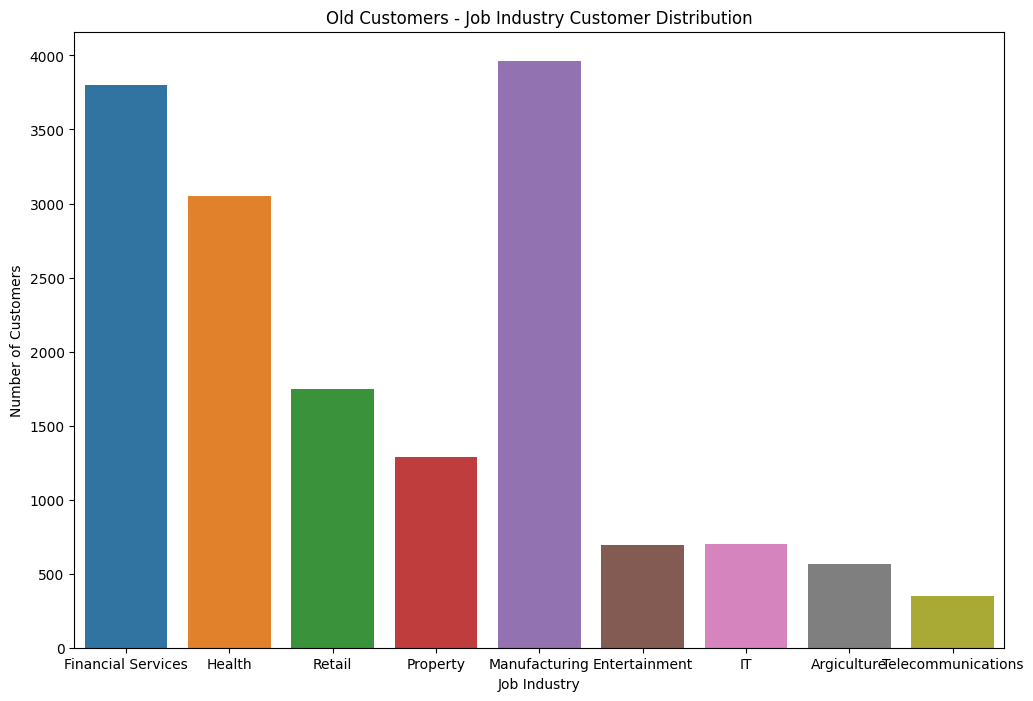

In [52]:
plt.figure(figsize = (12,8))
sns.countplot( x= 'job_industry_category' , data = merged_tran_cusdemo_rfm[~(merged_tran_cusdemo_rfm['job_industry_category'] == 'Missing')] )
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

### 1.4 Wealth Segmentation by Age Group

#### 1.4.1 New Customers

In [58]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'age_group']).size().reset_index()

In [59]:
wealth_age_seg_new

,wealth_segment,age_group,0
0,Affluent Customer,30,48
1,Affluent Customer,40,14
2,Affluent Customer,50,57
3,Affluent Customer,60,41
4,Affluent Customer,70,40
5,Affluent Customer,80,24
6,Affluent Customer,90,11
7,High Net Worth,30,35
8,High Net Worth,40,35
9,High Net Worth,50,53


In [60]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)

In [61]:
wealth_age_seg_new

,wealth_segment,age_group,Number of Customers
0,Affluent Customer,30,48
1,Affluent Customer,40,14
2,Affluent Customer,50,57
3,Affluent Customer,60,41
4,Affluent Customer,70,40
5,Affluent Customer,80,24
6,Affluent Customer,90,11
7,High Net Worth,30,35
8,High Net Worth,40,35
9,High Net Worth,50,53


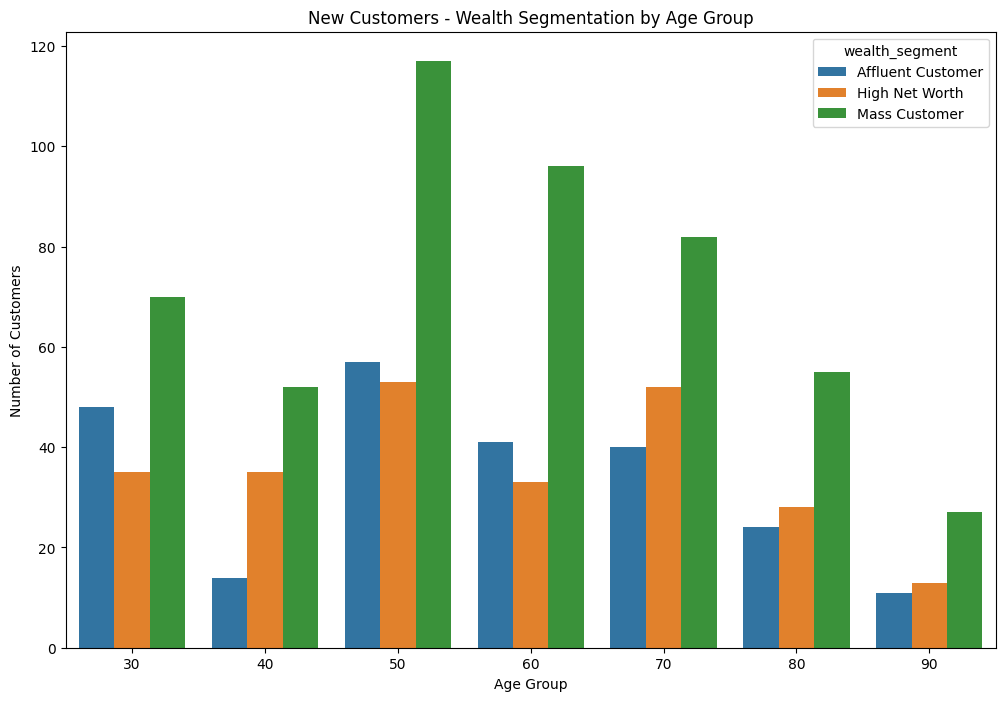

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(x='age_group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

#### 1.4.2 Old customers

In [53]:
wealth_age_seg_old = merged_tran_cusdemo_rfm.groupby(['wealth_segment' , 'age_group']).size().reset_index()

In [54]:
wealth_age_seg_old

,wealth_segment,age_group,0
0,Affluent Customer,20,0
1,Affluent Customer,30,859
2,Affluent Customer,40,768
3,Affluent Customer,50,1540
4,Affluent Customer,60,894
5,Affluent Customer,70,644
6,Affluent Customer,80,5
7,Affluent Customer,90,0
8,High Net Worth,20,0
9,High Net Worth,30,727


In [55]:
wealth_age_seg_old.rename(columns = {0 : 'Number of Customers'}, inplace = True)

In [56]:
wealth_age_seg_old

,wealth_segment,age_group,Number of Customers
0,Affluent Customer,20,0
1,Affluent Customer,30,859
2,Affluent Customer,40,768
3,Affluent Customer,50,1540
4,Affluent Customer,60,894
5,Affluent Customer,70,644
6,Affluent Customer,80,5
7,Affluent Customer,90,0
8,High Net Worth,20,0
9,High Net Worth,30,727


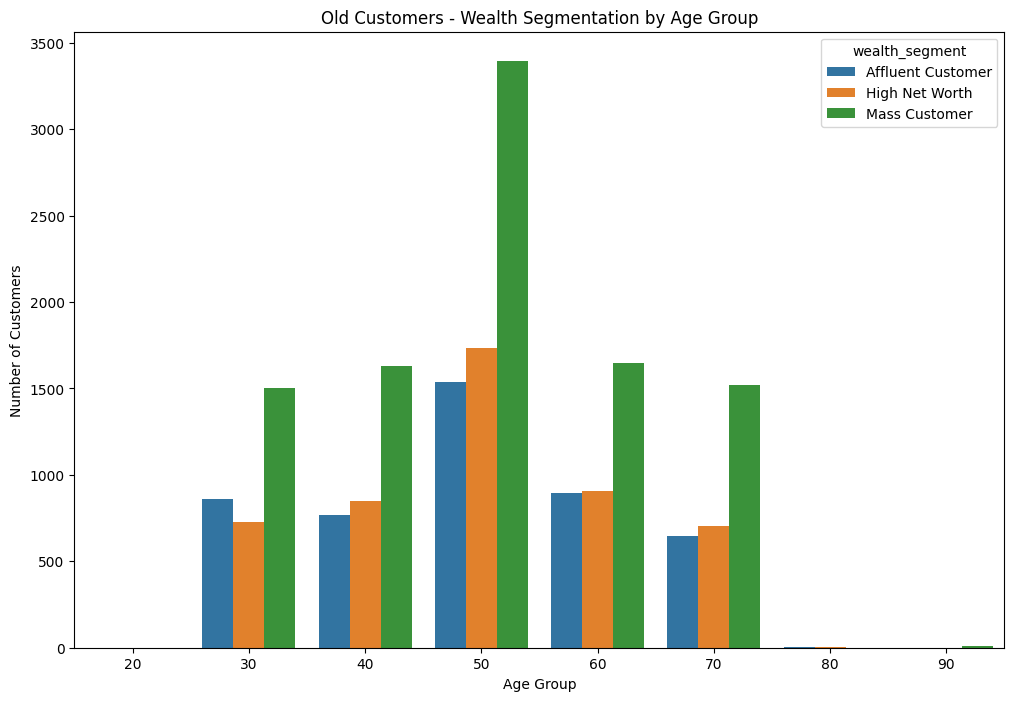

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x='age_group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

### 1.5 Car owner across each State

In [63]:
# Loading the Customer Address Dataset.

cust_addr_info = pd.read_csv('CustomerAddess_Cleaned.csv')

In [64]:
# Merging the RFM data with Customer Address dataset.

cust_trans_addr = pd.merge(merged_tran_cusdemo_rfm, cust_addr_info, left_on = 'customer_id' , right_on = 'customer_id', how='inner')

In [65]:
cust_trans_addr

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,m_quartile,rfm_score,customer_title,detail_cust_title,rank,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,1,211,Bronze,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,1,211,Bronze,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,1,211,Bronze,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,4,334,Gold,Late Bloomer,6,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,4,334,Gold,Late Bloomer,6,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,4,114,Bronze,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7
19323,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,4,114,Bronze,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7
19324,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,114,Bronze,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7
19325,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,114,Bronze,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7


In [66]:
# Total Records
print('RFM table records count : {}'. format(merged_tran_cusdemo_rfm.shape[0]))
print('Address table records count : {}'. format(cust_addr_info.shape[0]))

RFM table records count : 19354
Address table records count : 3999


In [67]:
state_car_owners = cust_trans_addr[['state', 'owns_car', 'customer_id']].drop_duplicates().groupby(['state','owns_car']).size().reset_index()

In [68]:
state_car_owners

,state,owns_car,0
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


In [69]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


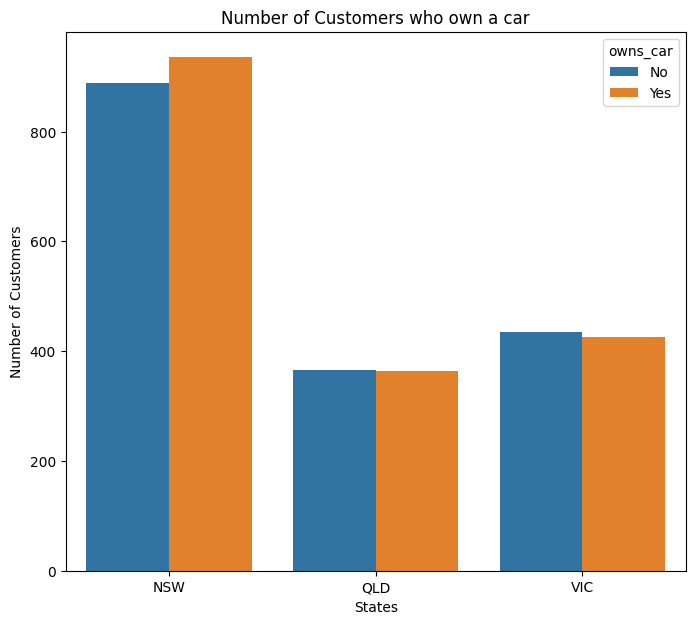

In [70]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

### 1.6 Customer Segment Distribution

**Finally we can plot the Number of Customers present under a Customer Segment.**

In [73]:
# Calculating the number of unique customers under a customer title.

cust_per_title = merged_tran_cusdemo_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')
cust_per_title

,detail_cust_title,rank,0
7,Platinum Customer,1,164
9,Very Loyal,2,181
1,Becoming Loyal,3,344
8,Recent Customer,4,357
4,Late Bloomer,6,672
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388
6,Lost Customer,11,291


In [74]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
9,Very Loyal,2,181
1,Becoming Loyal,3,344
8,Recent Customer,4,357
4,Late Bloomer,6,672
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388
6,Lost Customer,11,291


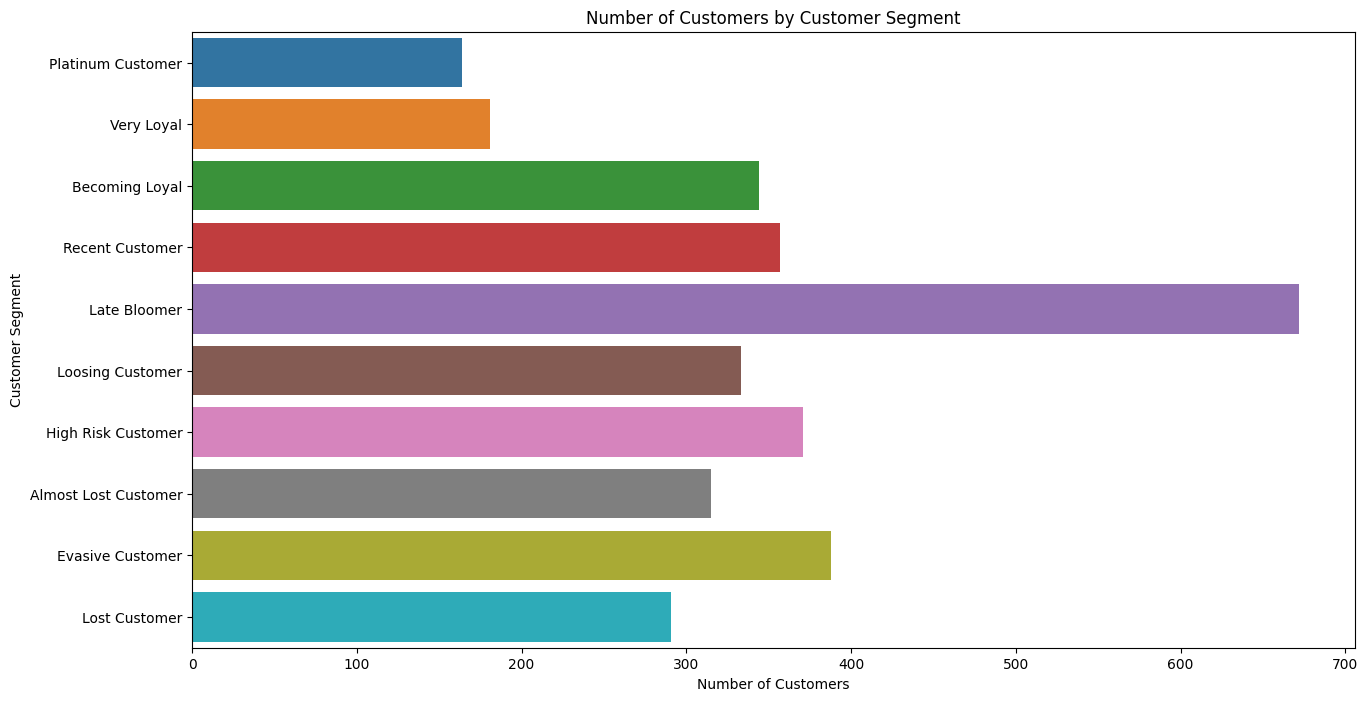

In [75]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')

plt.show()